In [1]:
#Import library
import pandas as pd

# Read the CSV files
df_bike_shares = pd.read_csv('resit_task2a.csv')
df_weather = pd.read_csv('resit_task2b.csv')


# Merge the two DataFrames into single dataframe with inner join using timestamp as the primary key 
merged_df = pd.merge(df_bike_shares, df_weather, on='timestamp', how='inner')

#read the first 5 rows to confirm
merged_df.head(5)

,timestamp,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,04/01/2015 00:00,182,3.0,2.0,93.0,6.0,1,3
1,04/01/2015 01:00,138,3.0,2.5,93.0,5.0,1,3
2,04/01/2015 02:00,134,2.5,2.5,96.5,0.0,1,3
3,04/01/2015 03:00,72,2.0,2.0,100.0,0.0,1,3
4,04/01/2015 04:00,47,2.0,0.0,93.0,6.5,1,3


### Explore the dataset to identify an "interesting" pattern or trend

In [2]:
#Import  required library
import matplotlib.pyplot as plt
%matplotlib inline
#check dataframe quality for datatype, null value, inconsistent data.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17414 entries, 0 to 17413
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        17414 non-null  object 
 1   new_bike_shares  17414 non-null  int64  
 2   temperature      17414 non-null  float64
 3   feels_like_temp  17414 non-null  float64
 4   humidity         17414 non-null  float64
 5   wind_speed       17414 non-null  float64
 6   is_weekend       17414 non-null  int64  
 7   season_code      17414 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 1.1+ MB


In [3]:
#timestamp not consistent with the datatype expected. hence we need to change it.
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])


# Set the 'timestamp' column as the index
merged_df.set_index('timestamp', inplace=True)

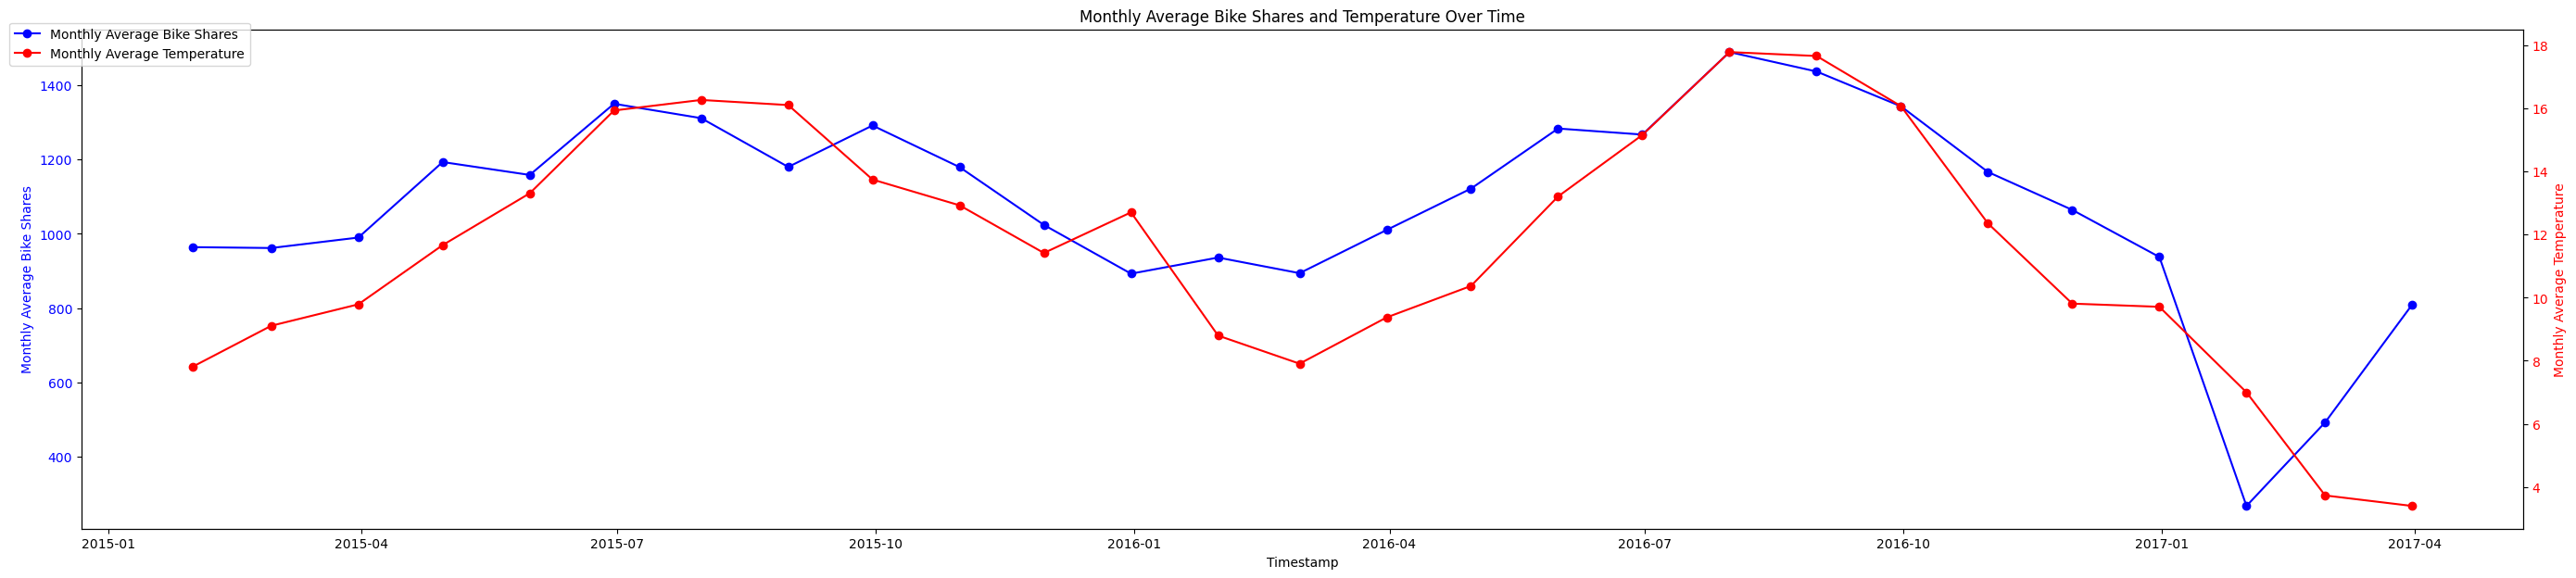

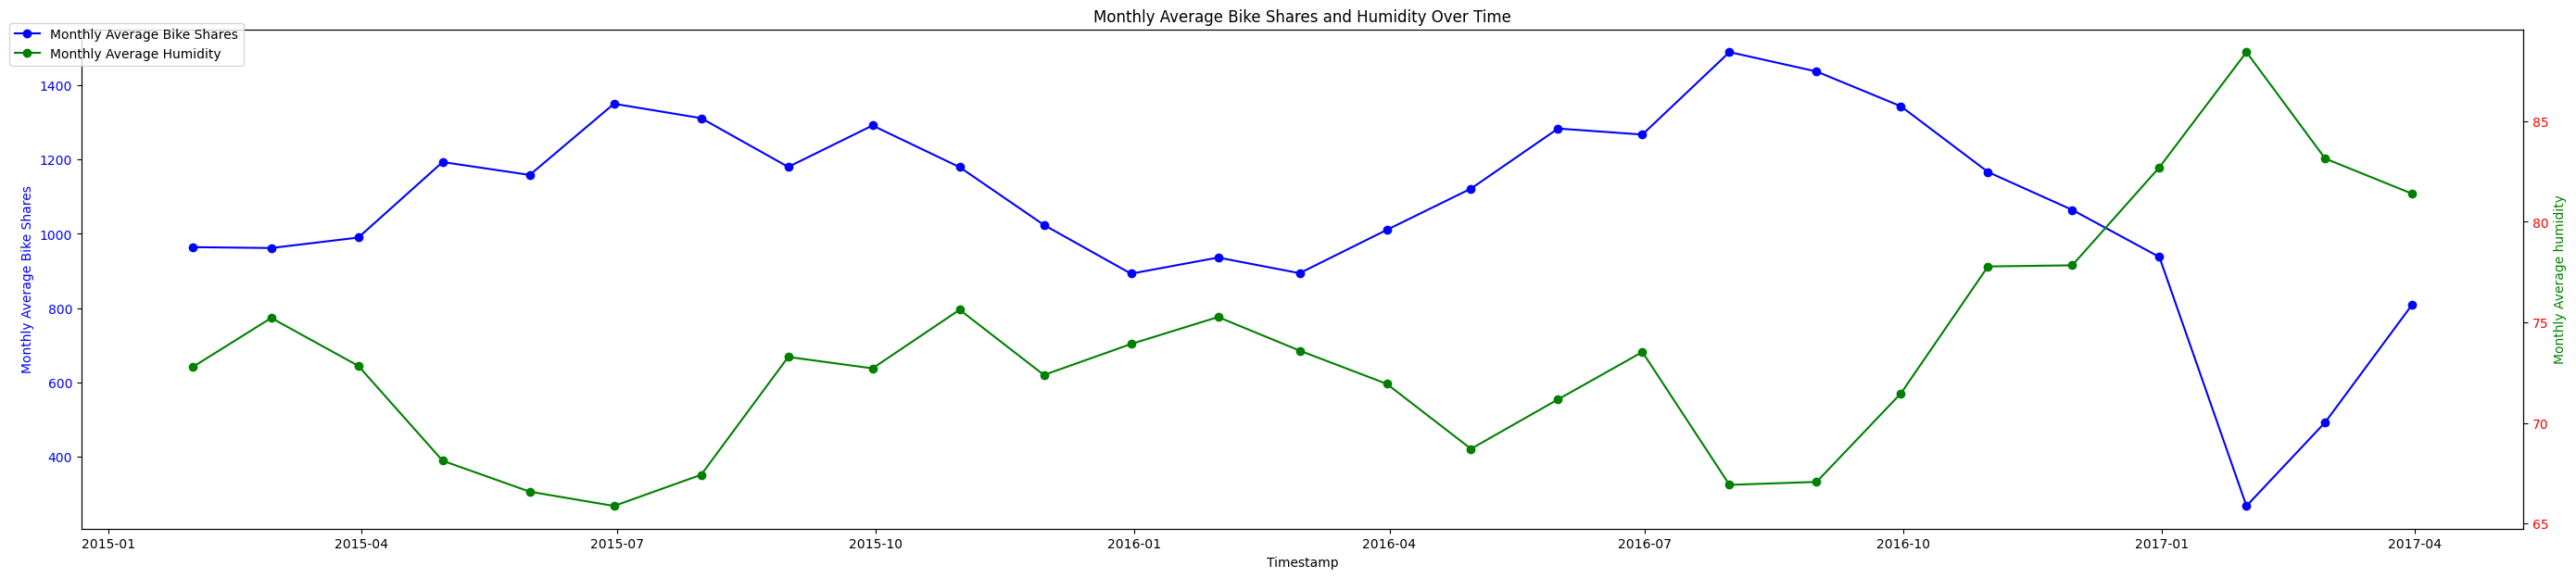

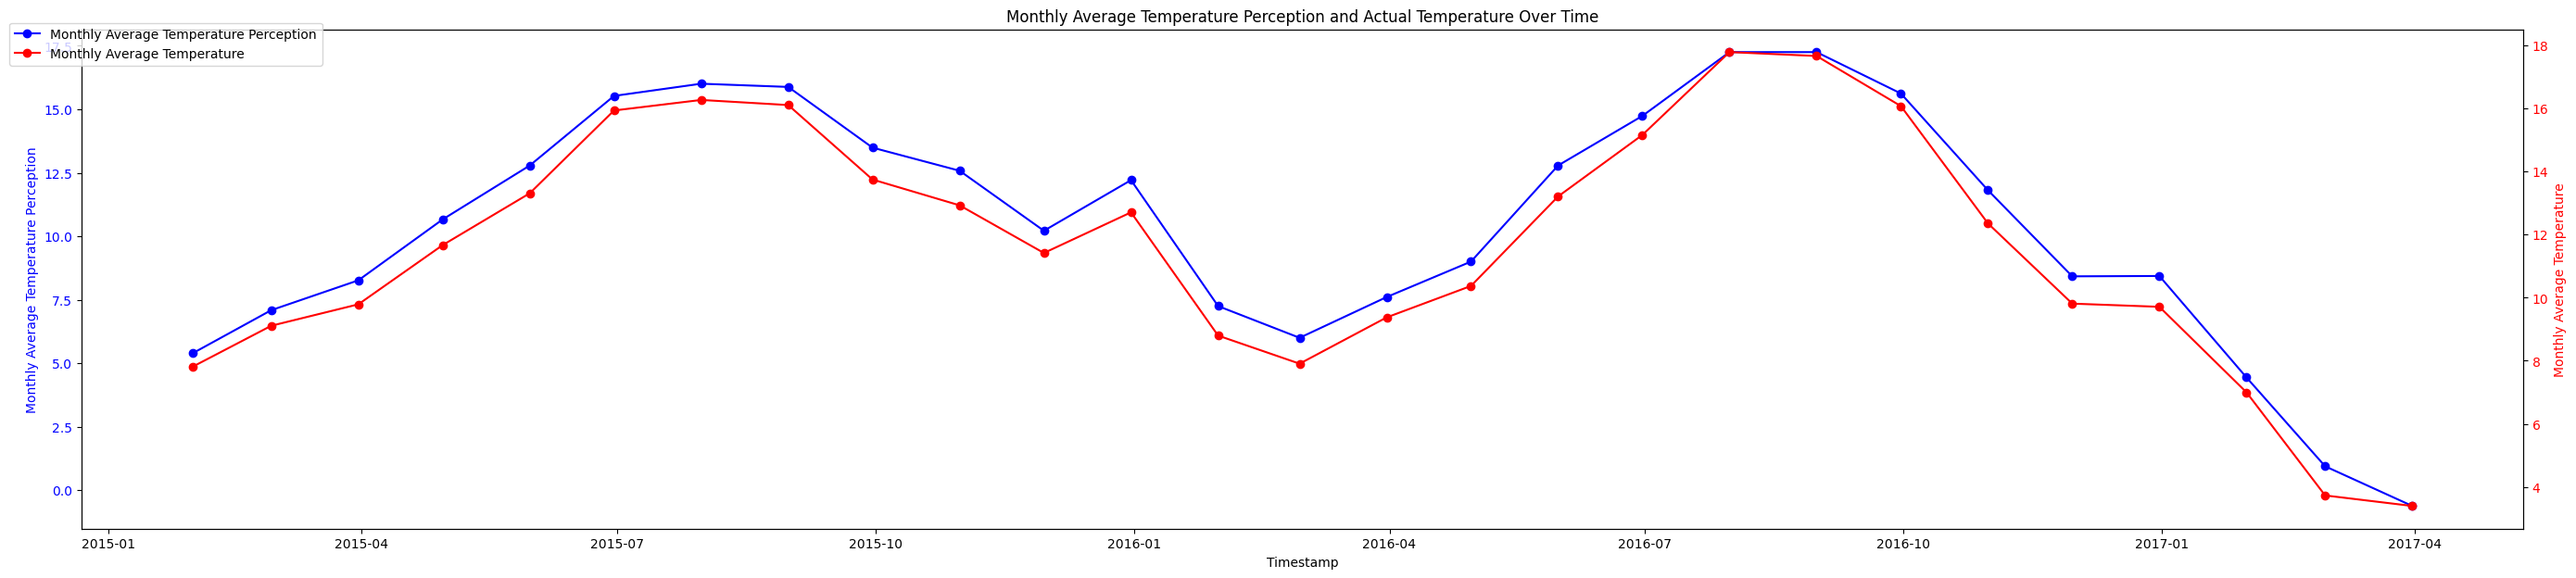

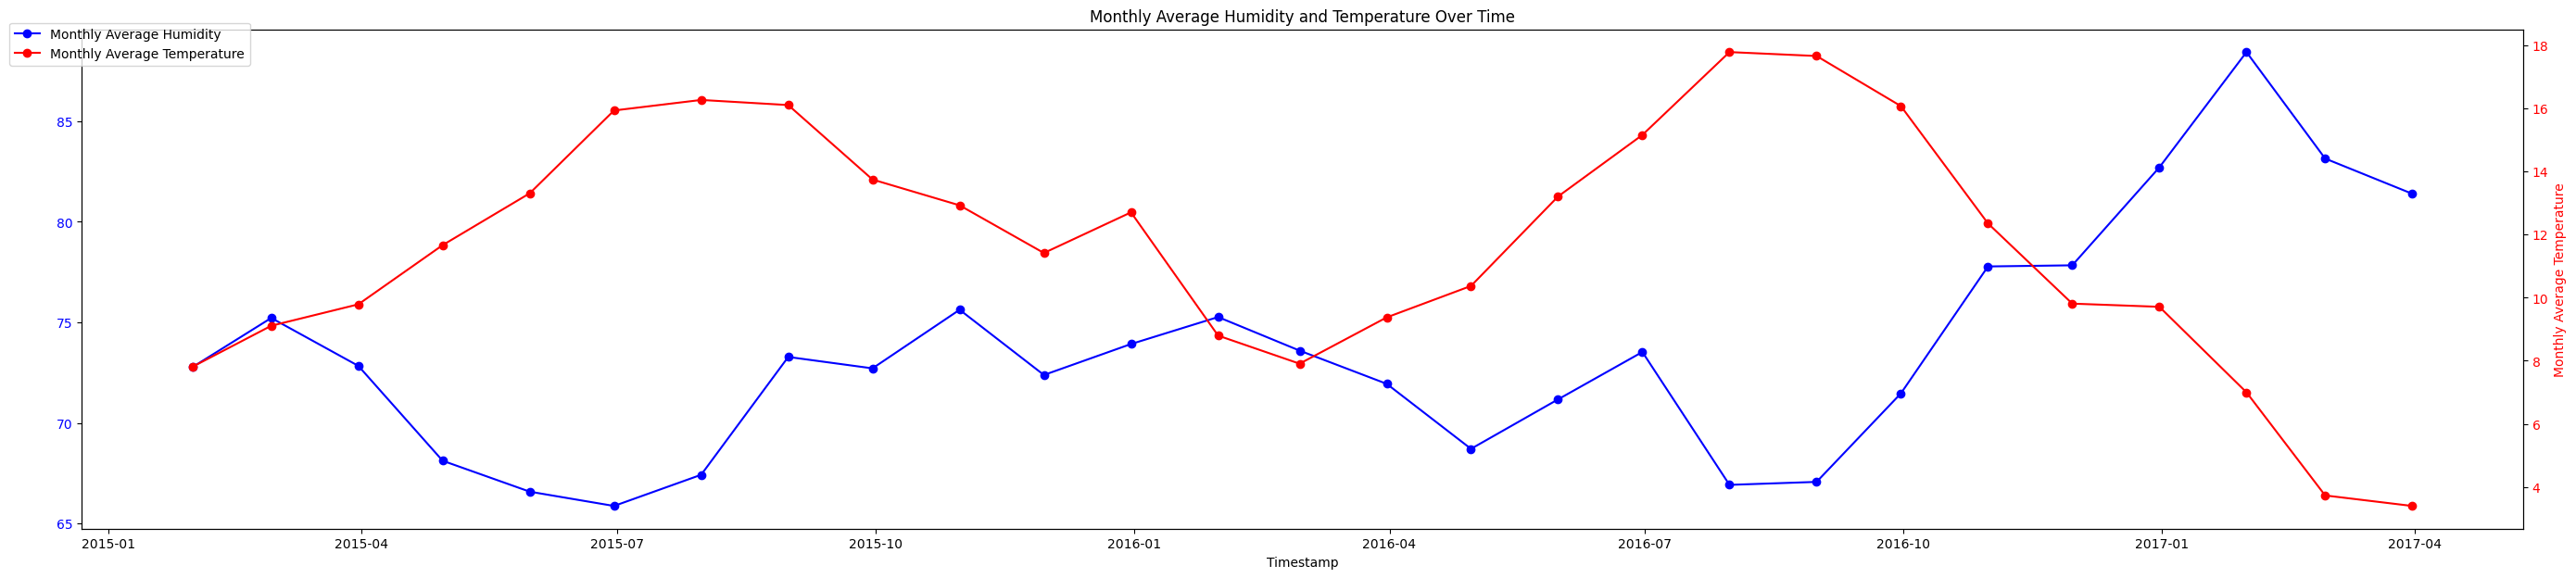

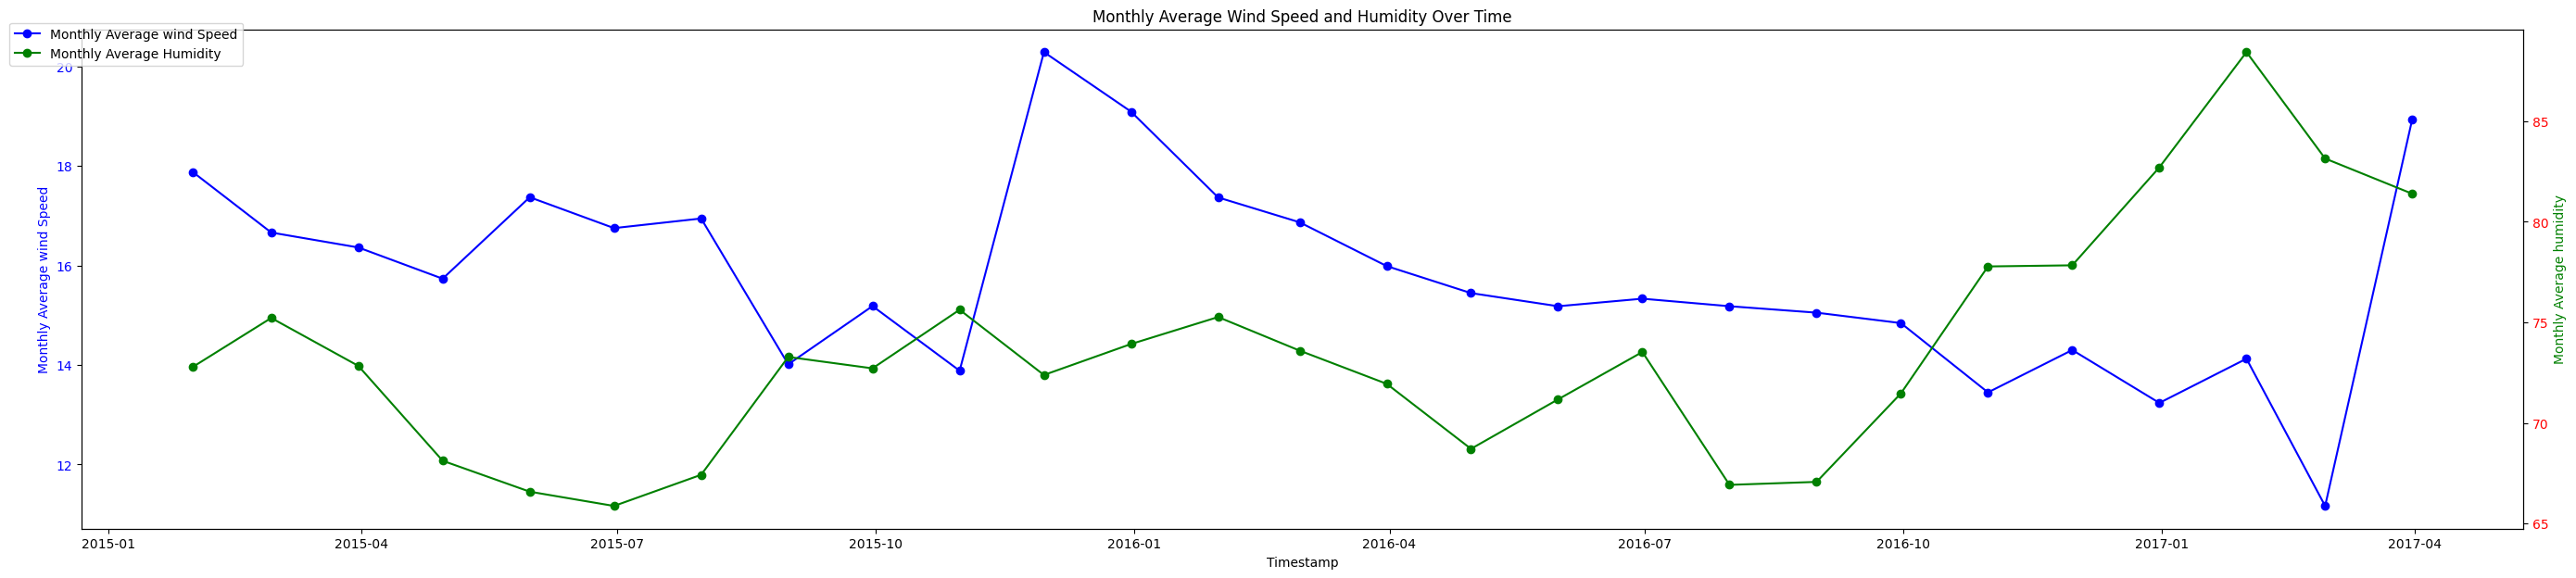

In [4]:
# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg_bike_shares = merged_df['new_bike_shares'].resample('M').mean()
monthly_avg_temperature = merged_df['temperature'].resample('M').mean()
monthly_avg_wind_speed = merged_df['wind_speed'].resample('M').mean()
monthly_avg_humidity = merged_df['humidity'].resample('M').mean()
monthly_avg_feels_like_temp = merged_df['feels_like_temp'].resample('M').mean()


################################################ Monthly Average Bike Shares and Temperature Over Time ######################################################
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(34, 7))  # Adjust the size for better visibility

# Plot the monthly average bike shares
ax1.plot(monthly_avg_bike_shares.index, monthly_avg_bike_shares, label='Monthly Average Bike Shares', color='blue', marker='o')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Monthly Average Bike Shares', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the temperature
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temperature.index, monthly_avg_temperature, label='Monthly Average Temperature', color='red', marker='o')
ax2.set_ylabel('Monthly Average Temperature', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('Monthly Average Bike Shares and Temperature Over Time')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()





################################################ Monthly Average Bike Shares and Humidity Over Time ######################################################

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(34, 7))  # Adjust the size for better visibility

# Plot the monthly average bike shares
ax1.plot(monthly_avg_bike_shares.index, monthly_avg_bike_shares, label='Monthly Average Bike Shares', color='blue', marker='o')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Monthly Average Bike Shares', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the humidity
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temperature.index, monthly_avg_humidity, label='Monthly Average Humidity', color='green', marker='o')
ax2.set_ylabel('Monthly Average humidity', color='green')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('Monthly Average Bike Shares and Humidity Over Time')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()







################################################ Monthly Average Temperature Perception and Actual Temperature Over Time ######################################################

# Create a figure and axis 
fig, ax1 = plt.subplots(figsize=(34, 7))  # Adjust the size for better visibility

# Plot the monthly average feels_like_temp
ax1.plot(monthly_avg_bike_shares.index, monthly_avg_feels_like_temp, label='Monthly Average Temperature Perception', color='blue', marker='o')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Monthly Average Temperature Perception', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the temperature
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temperature.index, monthly_avg_temperature, label='Monthly Average Temperature', color='red', marker='o')
ax2.set_ylabel('Monthly Average Temperature', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('Monthly Average Temperature Perception and Actual Temperature Over Time')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()




################################################ Monthly Average Humidity and Temperature Over Time ######################################################
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(34, 7))  # Adjust the size for better visibility

# Plot the monthly average humidity
ax1.plot(monthly_avg_bike_shares.index, monthly_avg_humidity, label='Monthly Average Humidity', color='blue', marker='o')
ax1.set_xlabel('Timestamp')
ax2.set_ylabel('Monthly Average humidity', color='green')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the temperature
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temperature.index, monthly_avg_temperature, label='Monthly Average Temperature', color='red', marker='o')
ax2.set_ylabel('Monthly Average Temperature', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('Monthly Average Humidity and Temperature Over Time')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()




################################################ Monthly Average Wind Speed and Humidity Over Time ######################################################
# Create a figure and axis for the bike shares
fig, ax1 = plt.subplots(figsize=(34, 7))  # Adjust the size for better visibility

# Plot the monthly average wind speed
ax1.plot(monthly_avg_bike_shares.index, monthly_avg_wind_speed, label='Monthly Average wind Speed', color='blue', marker='o')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Monthly Average wind Speed', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the humidity
ax2 = ax1.twinx()
ax2.plot(monthly_avg_temperature.index, monthly_avg_humidity, label='Monthly Average Humidity', color='green', marker='o')
ax2.set_ylabel('Monthly Average humidity', color='green')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title
plt.title('Monthly Average Wind Speed and Humidity Over Time')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()


### Detect and remove any outliers in the data used for your "interesting" pattern or trend

In [5]:
# A Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound




# A  Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [6]:

# Detect outliers in 'new_bike_shares'
outliers_bike_shares, lower_bound_bike_shares, upper_bound_bike_shares = detect_outliers_iqr(merged_df, 'new_bike_shares')

# Detect outliers in 'temperature'
outliers_temperature, lower_bound_temperature, upper_bound_temperature = detect_outliers_iqr(merged_df, 'temperature')


# Detect outliers in 'humidity'
outliers_humidity, lower_bound_humidity, upper_bound_humidity = detect_outliers_iqr(merged_df, 'humidity')


# Output the results
print("Outliers in 'new_bike_shares':")
print(outliers_bike_shares)
print(f"Lower bound: {lower_bound_bike_shares}, Upper bound: {upper_bound_bike_shares}")

print("\nOutliers in 'temperature':")
print(outliers_temperature)
print(f"Lower bound: {lower_bound_temperature}, Upper bound: {upper_bound_temperature}")

print("\nOutliers in 'temperature':")
print(outliers_humidity)
print(f"Lower bound: {lower_bound_humidity}, Upper bound: {upper_bound_humidity}")

Outliers in 'new_bike_shares':
                     new_bike_shares  temperature  feels_like_temp  humidity  \
timestamp                                                                      
2015-01-13 08:00:00             3960          9.0              6.5      71.0   
2015-01-14 08:00:00             3904          4.0             -1.0      70.0   
2015-01-22 08:00:00             3828          2.0              1.0      81.0   
2015-01-27 08:00:00             3835          5.5              2.5      78.5   
2015-02-24 08:00:00             3841          6.0              2.0      76.0   
...                              ...          ...              ...       ...   
2016-12-12 08:00:00             3982          5.5              3.5      96.5   
2016-12-13 08:00:00             4258         10.5             10.5      91.0   
2016-12-14 08:00:00             4162          9.0              8.0      94.0   
2016-12-15 08:00:00             4198          8.5              6.5      93.5   
2016-12-2

In [7]:
# Remove outliers in 'new_bike_shares'
filtered_df = remove_outliers_iqr(merged_df, 'new_bike_shares')

# Remove outliers in 'temperature' from the filtered DataFrame
filtered_df = remove_outliers_iqr(filtered_df, 'temperature')

# Remove outliers in 'humidity' from the filtered DataFrame
filtered_df = remove_outliers_iqr(filtered_df, 'humidity')

# Remove outliers in 'wind_speed' from the filtered DataFrame
filtered_df = remove_outliers_iqr(filtered_df, 'wind_speed')

# Remove outliers in 'feels_like_temp' from the filtered DataFrame
filtered_df = remove_outliers_iqr(filtered_df, 'feels_like_temp')

# Output the results
print(f"Original data shape: {merged_df.shape}")
print(f"Filtered data shape: {filtered_df.shape}")

# Optionally, reset the index if needed
filtered_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the filtered data
filtered_df.head()

Original data shape: (17414, 7)
Filtered data shape: (16357, 7)


,new_bike_shares,temperature,feels_like_temp,humidity,wind_speed,is_weekend,season_code
0,182,3.0,2.0,93.0,6.0,1,3
1,138,3.0,2.5,93.0,5.0,1,3
2,134,2.5,2.5,96.5,0.0,1,3
3,72,2.0,2.0,100.0,0.0,1,3
4,47,2.0,0.0,93.0,6.5,1,3


### Define a hypothesis to test your “interesting” pattern or trend

In [8]:
from scipy.stats import pearsonr

# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg = merged_df.resample('M').mean()

# Perform Pearson correlation test
correlation, p_value = pearsonr(monthly_avg['new_bike_shares'], monthly_avg['temperature'])

correlation_v1, p_value_v1 = pearsonr(monthly_avg['new_bike_shares'], monthly_avg['humidity'])

correlation_v2, p_value_v2 = pearsonr(monthly_avg['feels_like_temp'], monthly_avg['temperature'])

correlation_v3, p_value_v3 = pearsonr(monthly_avg['wind_speed'], monthly_avg['humidity'])

correlation_v4, p_value_v4 = pearsonr(monthly_avg['temperature'], monthly_avg['humidity'])


# Print the correlation and p-value for new_bike_shares  and temperature
print ('correlation and p-value for new_bike_shares  and temperature')
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

print ('\n')
# Print the correlation and p-value for new_bike_shares  and humidity
print ('correlation and p-value for new_bike_shares  and humidity')
print(f"Pearson correlation coefficient (new_bike_shares and humidity): {correlation_v1}")
print(f"P-value  (new_bike_shares and humidity): {p_value_v1}")

print ('\n')
# Print the correlation and p-value for feels_like_temp and temperature
print ('correlation and p-value for feels_like_temp and temperature')
print(f"Pearson correlation coefficient (feels_like_temp and temperature): {correlation_v2}")
print(f"P-value  (feels_like_temp and temperature): {p_value_v2}")

print ('\n')
# Print the correlation and p-value for wind_speed and humidity
print ('correlation and p-value for wind_speed and humidity')
print(f"Pearson correlation coefficient (wind_speed and humidity): {correlation_v3}")
print(f"P-value  (wind_speed and humidity): {p_value_v3}")

print ('\n')
# Print the correlation and p-value for temperature and humidity)
print ('correlation and p-value for temperature and humidity')
print(f"Pearson correlation coefficient (temperature and humidity): {correlation_v4}")
print(f"P-value  (temperature and humidity): {p_value_v4}")


correlation and p-value for new_bike_shares  and temperature
Pearson correlation coefficient: 0.8501322550396111
P-value: 1.993184313645633e-08


correlation and p-value for new_bike_shares  and humidity
Pearson correlation coefficient (new_bike_shares and humidity): -0.818761668676234
P-value  (new_bike_shares and humidity): 1.7913972497348417e-07


correlation and p-value for feels_like_temp and temperature
Pearson correlation coefficient (feels_like_temp and temperature): 0.9967941387858116
P-value  (feels_like_temp and temperature): 6.003359481593045e-29


correlation and p-value for wind_speed and humidity
Pearson correlation coefficient (wind_speed and humidity): -0.3488890833432681
P-value  (wind_speed and humidity): 0.07448482077454284


correlation and p-value for temperature and humidity
Pearson correlation coefficient (temperature and humidity): -0.6999086198967114
P-value  (temperature and humidity): 4.831787872063099e-05


### Test your hypothesis with statistical significance level of 0.05

In [10]:
# Hypothesis testing interpretation for new_bike_shares  and temperature
alpha = 0.05  # Significance level
print ('Hypothesis testing interpretation for new_bike_shares  and temperature')
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between bike shares and temperature.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between bike shares and temperature.")




# Hypothesis testing interpretation for new_bike_shares  and temperature
alpha = 0.05  # Significance level
print('\n')
print ('Hypothesis testing interpretation for new_bike_shares  and humidity')
if p_value_v1 < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between new_bike_shares  and humidity.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between new_bike_shares  and humidity.")



# Hypothesis testing interpretation for feels_like_temp and temperature
alpha = 0.05  # Significance level
print('\n')
print ('Hypothesis testing interpretation for feels_like_temp and temperature')
if p_value_v2 < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between feels_like_temp and temperature.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between feels_like_temp and temperature.")



# Hypothesis testing interpretation for wind_speed and humidity
alpha = 0.05  # Significance level
print('\n')
print ('Hypothesis testing interpretation for wind_speed and humidity')
if p_value_v3 < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between wind_speed and humidity.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between wind_speed and humidity.")


# Hypothesis testing interpretation for temperature and humidity
alpha = 0.05  # Significance level
print('\n')
print ('Hypothesis testing interpretation for temperature and humidity')
if p_value_v4 < alpha:
    print("Reject the null hypothesis (H0): There is a significant relationship between temperature and humidity.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant relationship between temperature and humidity.")



Hypothesis testing interpretation for new_bike_shares  and temperature
Reject the null hypothesis (H0): There is a significant relationship between bike shares and temperature.


Hypothesis testing interpretation for new_bike_shares  and humidity
Reject the null hypothesis (H0): There is a significant relationship between new_bike_shares  and humidity.


Hypothesis testing interpretation for feels_like_temp and temperature
Reject the null hypothesis (H0): There is a significant relationship between feels_like_temp and temperature.


Hypothesis testing interpretation for wind_speed and humidity
Fail to reject the null hypothesis (H0): There is no significant relationship between wind_speed and humidity.


Hypothesis testing interpretation for temperature and humidity
Reject the null hypothesis (H0): There is a significant relationship between temperature and humidity.


Pearson correlation coefficient between new_bike_shares and temperature: 0.8501322550396111
P-value: 1.993184313645633e-08
Reject the null hypothesis (H0): There is a significant relationship between new_bike_shares and temperature.

Pearson correlation coefficient between new_bike_shares and humidity: -0.818761668676234
P-value: 1.7913972497348417e-07
Reject the null hypothesis (H0): There is a significant relationship between new_bike_shares and humidity.

Pearson correlation coefficient between feels_like_temp and temperature: 0.9967941387858116
P-value: 6.003359481593045e-29
Reject the null hypothesis (H0): There is a significant relationship between feels_like_temp and temperature.

Pearson correlation coefficient between wind_speed and humidity: -0.3488890833432681
P-value: 0.07448482077454284
Fail to reject the null hypothesis (H0): There is no significant relationship between wind_speed and humidity.

Pearson correlation coefficient between temperature and humidity: -0.69990861

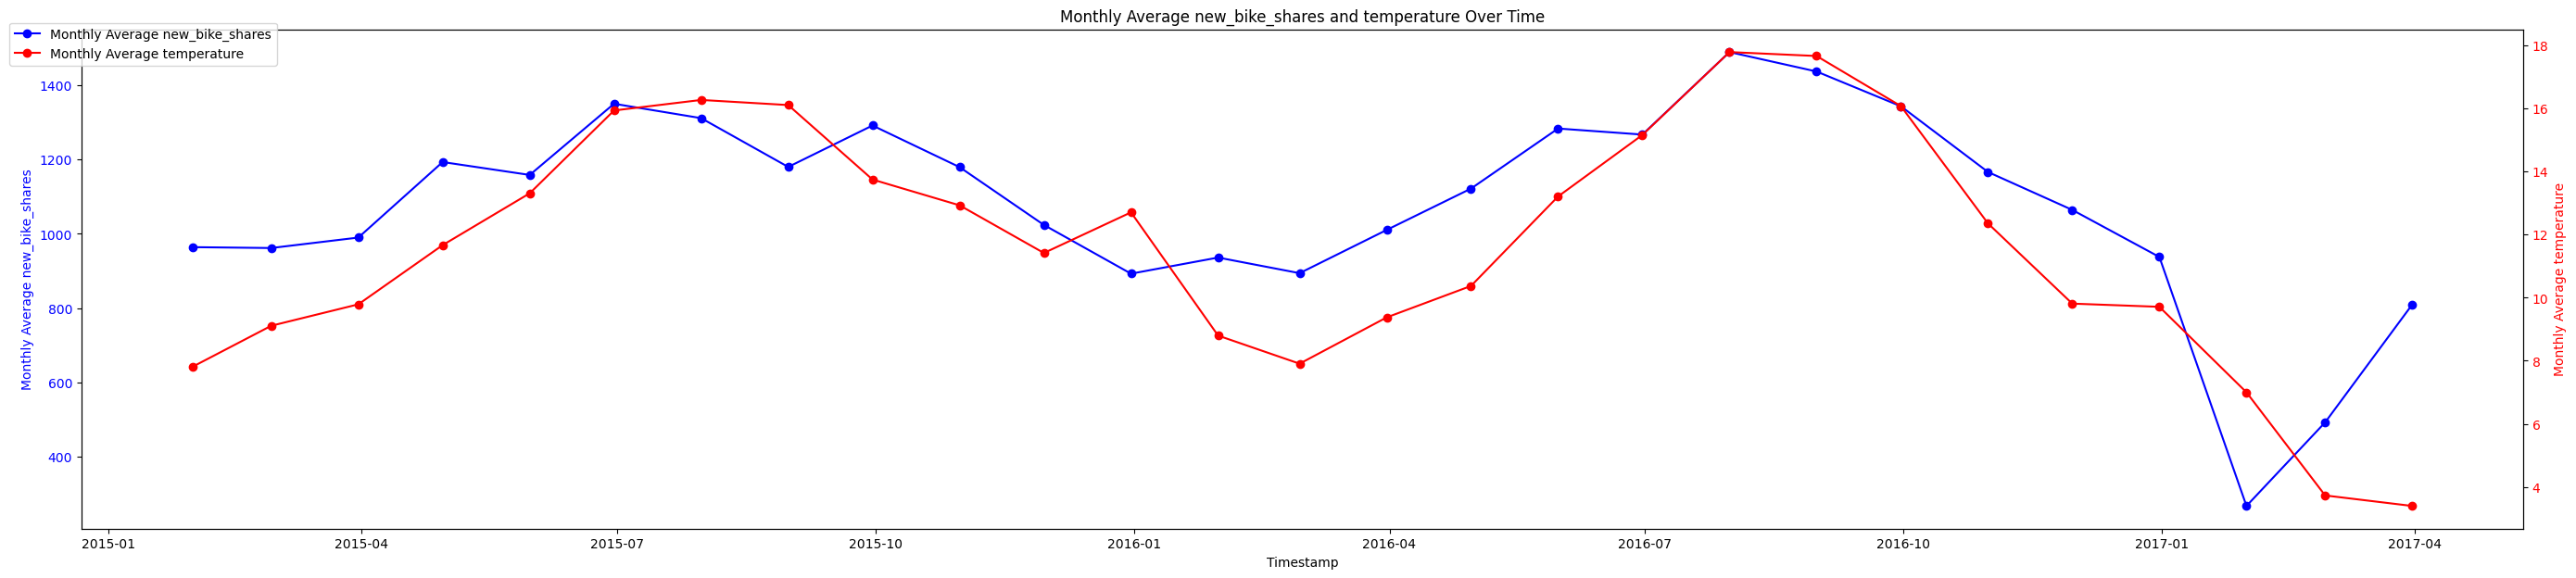

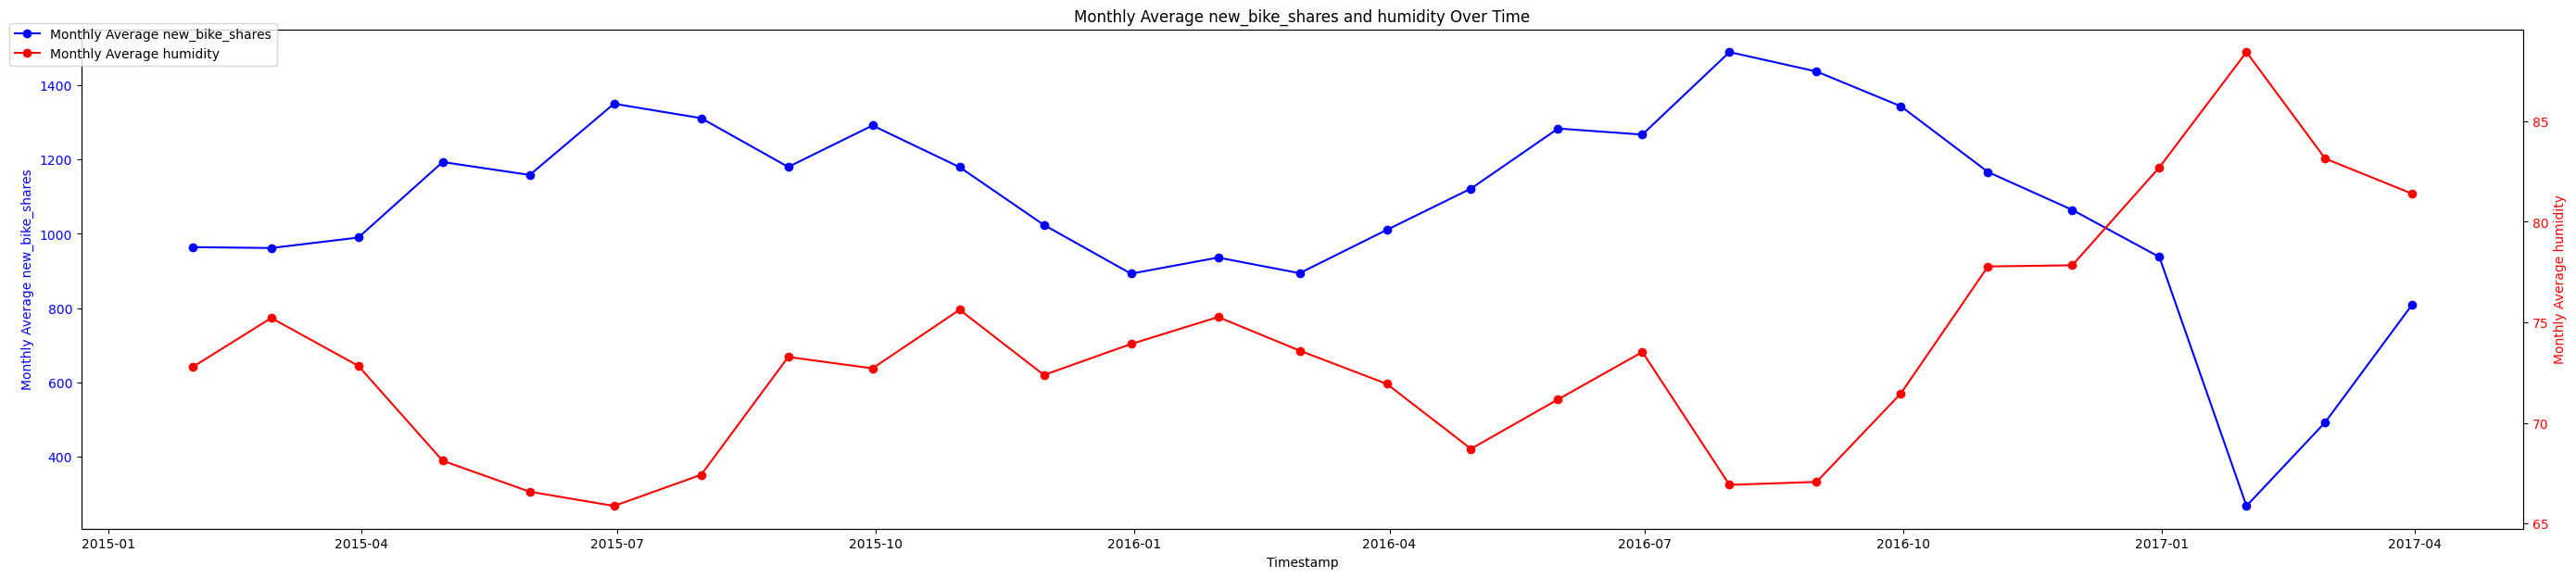

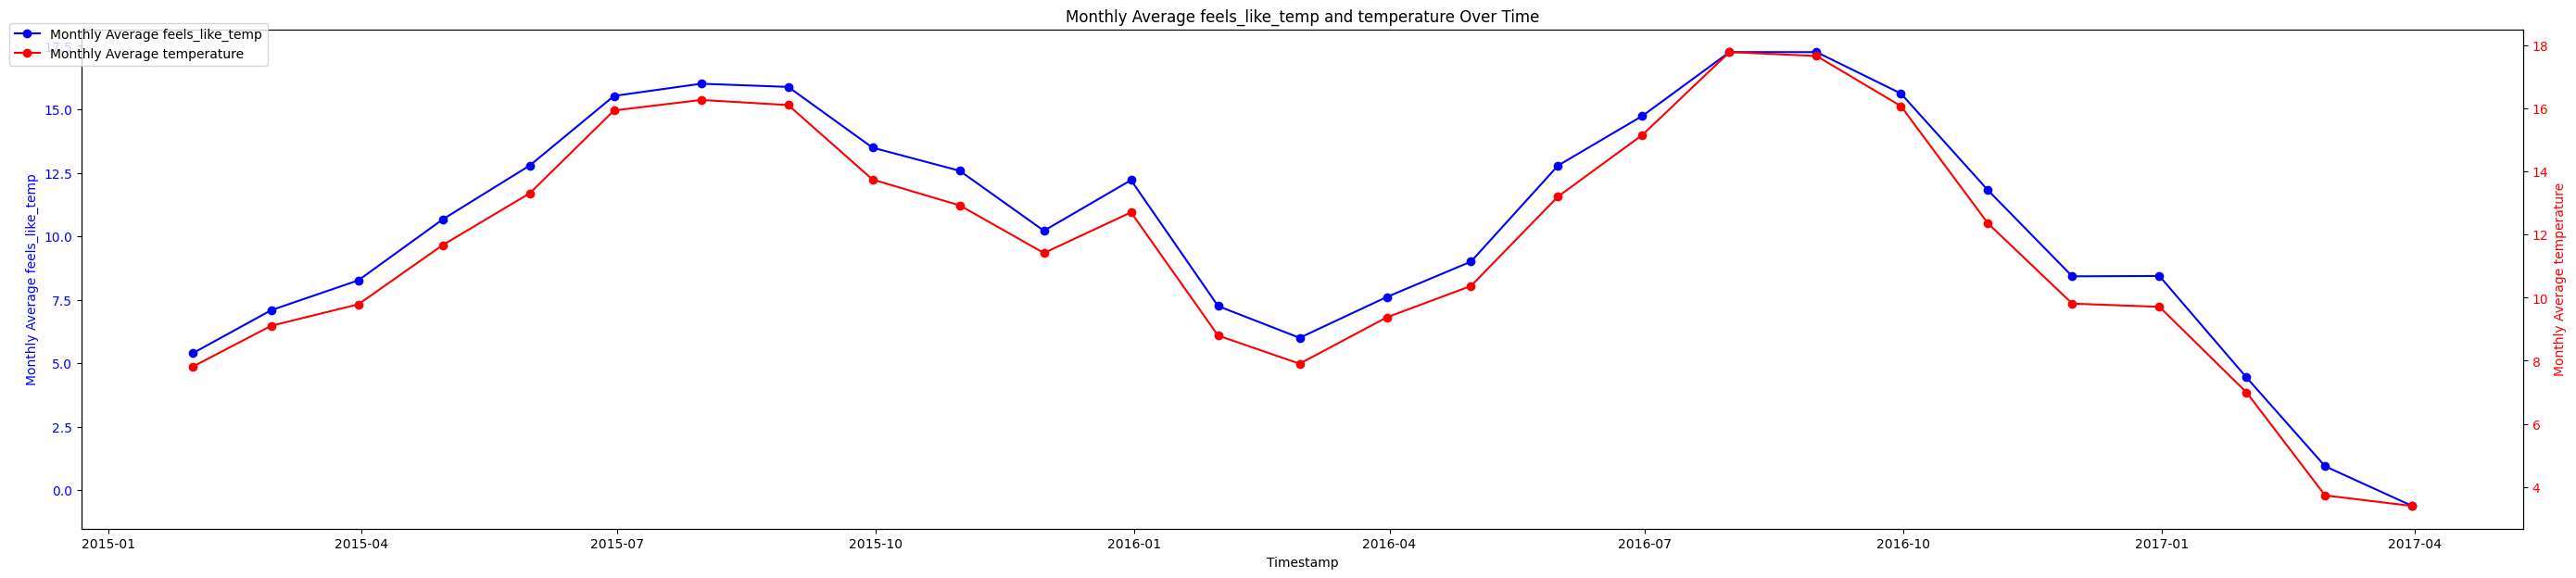

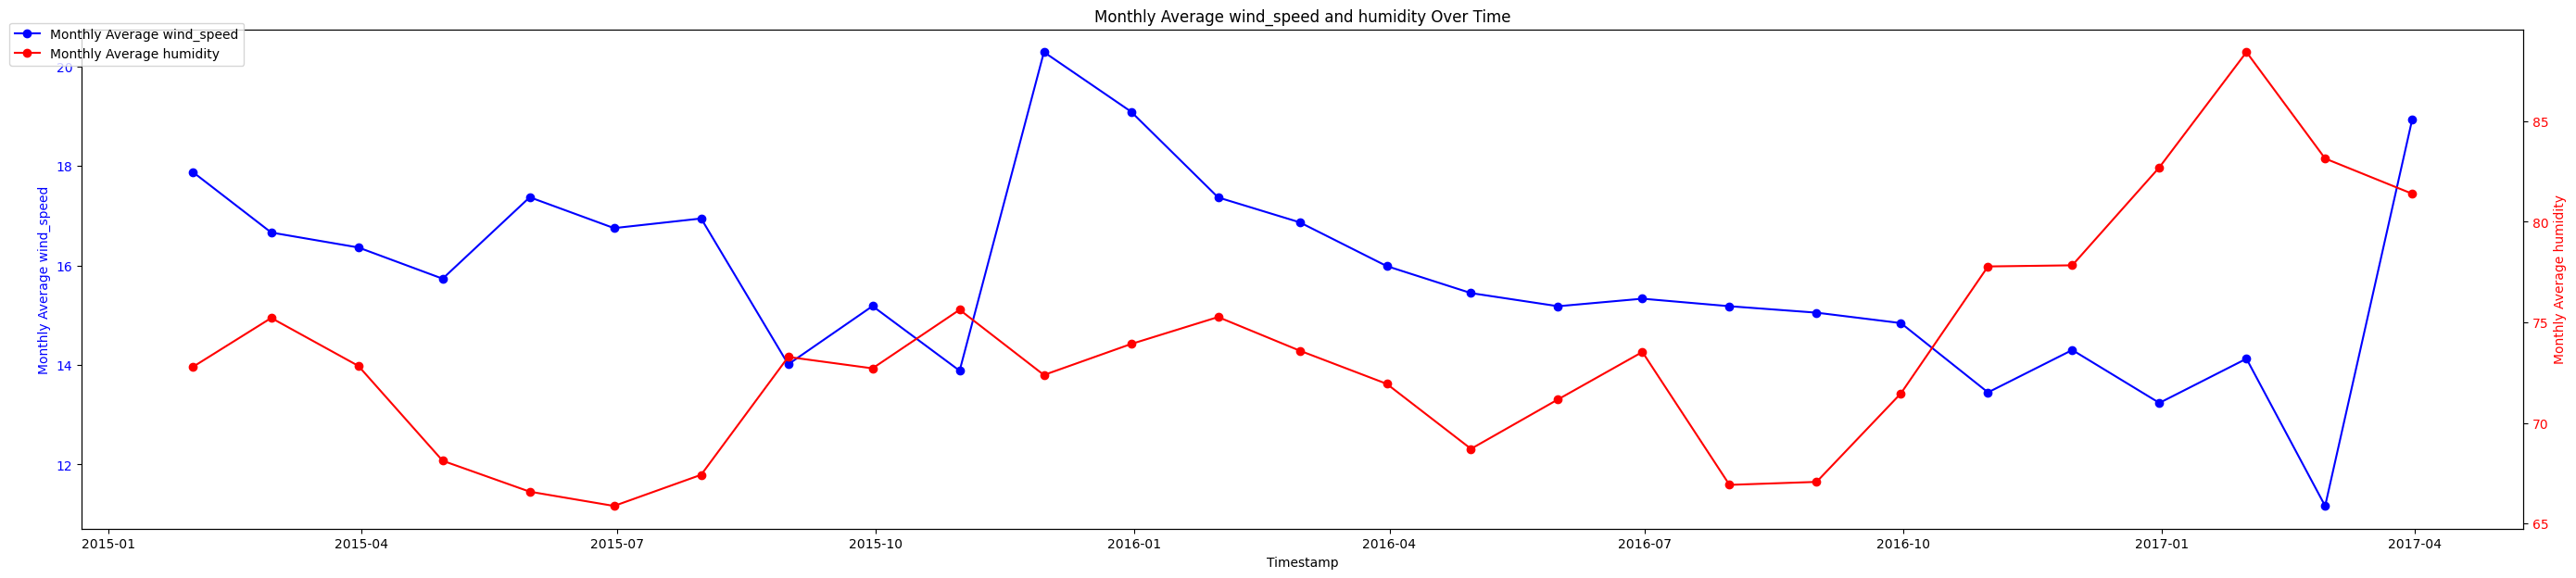

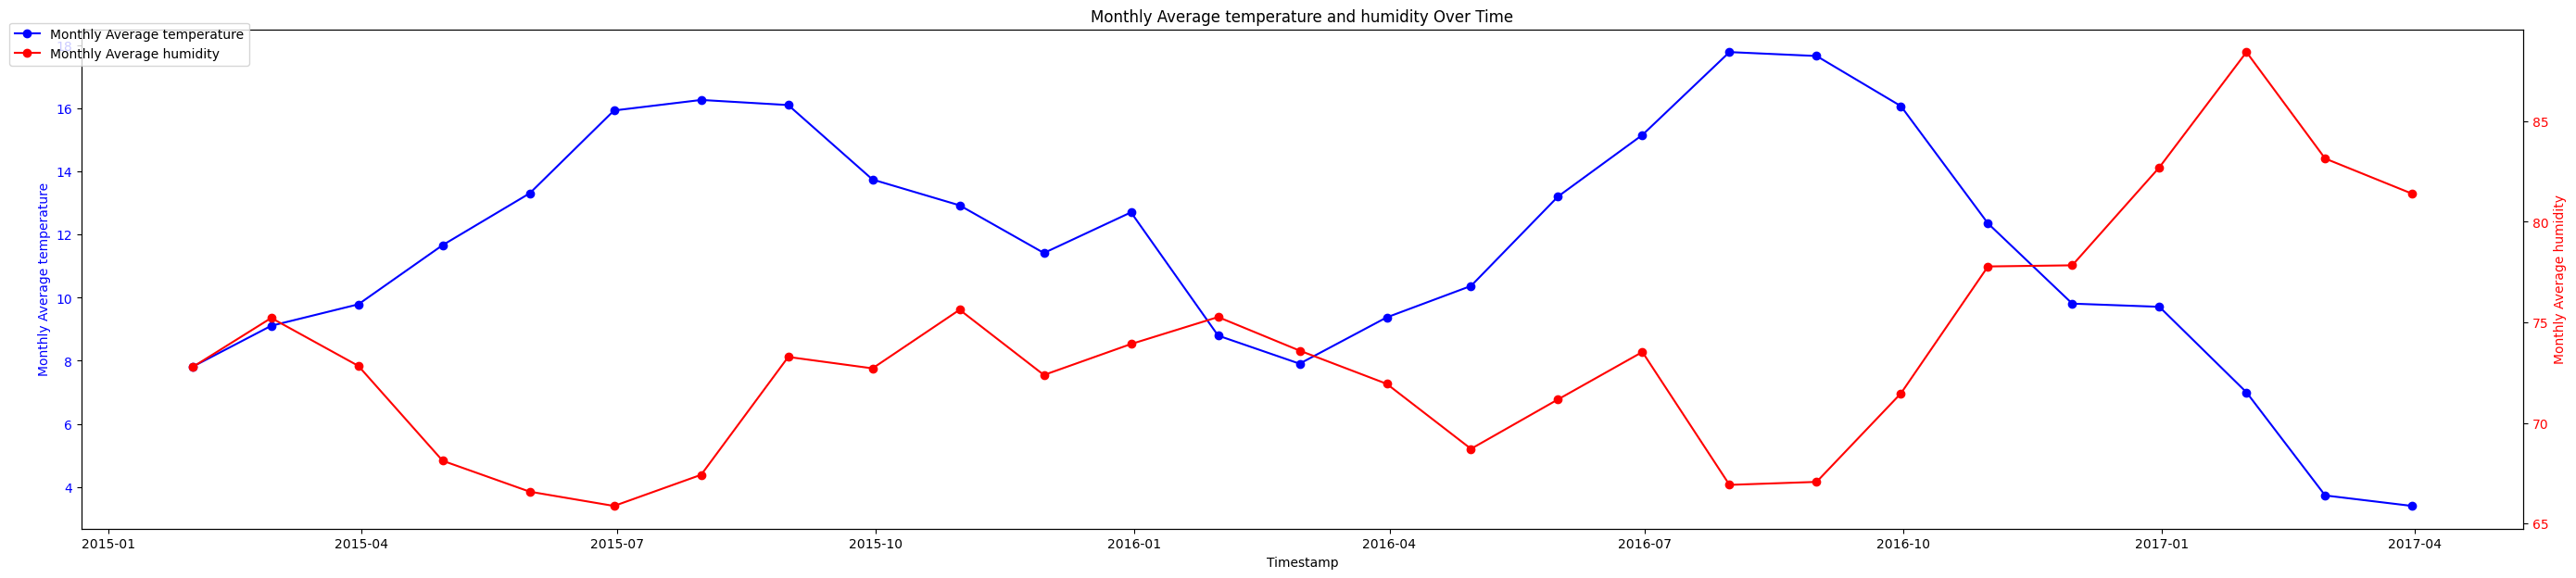

In [11]:
# Function to perform Pearson correlation test and interpret the result
def test_correlation(var1, var2, data, alpha=0.05):
    correlation, p_value = pearsonr(data[var1], data[var2])
    print(f"Pearson correlation coefficient between {var1} and {var2}: {correlation}")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(f"Reject the null hypothesis (H0): There is a significant relationship between {var1} and {var2}.\n")
    else:
        print(f"Fail to reject the null hypothesis (H0): There is no significant relationship between {var1} and {var2}.\n")

# Test cases
test_correlation('new_bike_shares', 'temperature', monthly_avg)
test_correlation('new_bike_shares', 'humidity', monthly_avg)
test_correlation('feels_like_temp', 'temperature', monthly_avg)
test_correlation('wind_speed', 'humidity', monthly_avg)
test_correlation('temperature', 'humidity', monthly_avg)

# Plotting the trendlines for visual inspection
def plot_trendlines(var1, var2, data):
    plt.figure(figsize=(34, 7))  # Adjust the size for better visibility
    ax1 = plt.gca()
    ax1.plot(data.index, data[var1], label=f'Monthly Average {var1}', color='blue', marker='o')
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel(f'Monthly Average {var1}', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2 = ax1.twinx()
    ax2.plot(data.index, data[var2], label=f'Monthly Average {var2}', color='red', marker='o')
    ax2.set_ylabel(f'Monthly Average {var2}', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.xticks(rotation=45)
    plt.title(f'Monthly Average {var1} and {var2} Over Time')
    fig = plt.gcf()
    fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
    plt.show()

# Plotting the trendlines
plot_trendlines('new_bike_shares', 'temperature', monthly_avg)
plot_trendlines('new_bike_shares', 'humidity', monthly_avg)
plot_trendlines('feels_like_temp', 'temperature', monthly_avg)
plot_trendlines('wind_speed', 'humidity', monthly_avg)
plot_trendlines('temperature', 'humidity', monthly_avg)

### Process Development Report

When I began the task, my primary objective was to merge two datasets containing bike share and weather information, clean and preprocess the data, perform exploratory data analysis, and conduct hypothesis testing to find any significant relationships between the variables. 
My thought process was to first ensure the data quality by checking for missing values, inconsistent data types, and outliers. After that, I aimed to explore the relationships between the bike share data and weather variables through visualization and statistical analysis.
Initially, I found the task challenging due to the data inconsistencies and the need for thorough preprocessing. Specifically, the timestamp column required conversion to a datetime format to enable time-based analysis. I overcame this by systematically addressing data type issues. 
One major problem was dealing with outliers, which could significantly skew the analysis results. To handle this, I implemented functions to detect and remove outliers using the IQR method, ensuring a more robust dataset for analysis. Additionally, managing the merging of datasets based on the timestamp and ensuring no data loss during the process was crucial. I used an inner join to ensure only matching records were included.
Another challenge was visualizing the relationships between variables. Creating dual-axis plots allowed me to compare bike share trends with different weather parameters effectively. However, interpreting these visualizations required careful consideration of potential correlations and causations.
The main strength of the approach was its thoroughness in data cleaning and preprocessing, which ensured that subsequent analyses were based on high-quality data. The use of Pearson correlation tests provided clear statistical evidence of relationships between variables. Additionally, visualizations helped in understanding trends and patterns over time.
However, a weakness was the reliance on the IQR method alone for outlier detection, which may not capture all types of outliers, especially in complex datasets. Furthermore, while Pearson correlation is useful, it only captures linear relationships and might miss more nuanced associations.
To improve the approach, incorporating multiple outlier detection methods, such as Z-score and DBSCAN, could provide a more comprehensive outlier analysis. Additionally, using other correlation measures, like Spearman's rank correlation, could help identify non-linear relationships.
An alternative approach could have been to use time series analysis methods like ARIMA models to understand the trends and seasonal patterns in bike share data. Machine learning techniques, such as regression models, could also be employed to predict bike share usage based on weather conditions, providing more actionable insights.
